# Regresión Lineal Multivariable

En este notebook se va a desarrollar un ejemplo de Regresión lineal multivariable.
Al igual que en los ejercicios anteriores, debes completar el codigo en las celdas donde diga "implementa tu codigo aqui"

In [115]:
%matplotlib inline


import pandas as pd
from sklearn import linear_model
import data_helper
import numpy as np
import matplotlib.pyplot as plt

In [116]:
 pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Cargando los datos

In [117]:
data_casas = data_helper.load_data()

In [118]:
data_casas.head(10)

,Area_Lote,Precio,dormitorios,banios,paqueos,anio_construccion,Vendedor
2,79.000,1035000.000,2,1,0,1900,Biggin
4,150.000,1465000.000,3,2,0,1900,Biggin
6,142.000,1600000.000,4,1,2,2014,Nelson
11,210.000,1876000.000,3,2,0,1910,Nelson
14,107.000,1636000.000,2,1,2,1890,Nelson
18,75.000,1097000.000,2,1,2,1900,Biggin
24,190.000,1350000.000,3,2,2,2005,Nelson
25,94.000,750000.000,2,2,1,2009,Biggin
30,97.000,1310000.000,2,1,2,1890,Jellis
32,110.000,1200000.000,3,2,1,1880,Jellis


In [119]:
data_casas.shape

(1000, 7)

## Feature Engineering

Para tener una mejor idea de que features nos pueden servir, generamos una matriz de correlación. 

En esta sección vamos a remover la columna de vendedor ya que no va a ser útil para el análisis y crear una nueva feature que se llame **numero_habitaciones** que va a ser la suma de las features **dormitorios** y **banios**

In [120]:
corr_matrix = data_casas.corr()
corr_matrix["Precio"].sort_values(ascending=False)

Precio               1.000
dormitorios          0.647
banios               0.569
Area_Lote            0.497
paqueos              0.361
anio_construccion   -0.194
Name: Precio, dtype: float64

#### Removiendo la columna 'Vendedor'

Para eliminar una columna en un data frame de pandas utilizamos:
```
DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
```
Si seteamos el valor de axis a 1, indicamos que queremos eliminar una columna. Ejemplo

```
+-----------------+
|A  | B |  C |  D |
+-----------------+   
| 0 | 1 |  2 |  3 |
| 4 | 5 |  6 |  7 |
| 8 | 9 | 10 | 11 |
+-----------------+   
```

```
df.drop(['B', 'C'], axis=1)
```

```
+--------+
|A  |  D |
+--------+   
| 0 |  3 |
| 4 |  7 |
| 8 | 11 |
+--------+ 
```

In [121]:
'''
implementa tu codigo aqui
'''
data_casas = data_casas.drop(["Vendedor"], axis=1)

In [122]:
# Mostramos las primeras 5 filas para validar que eliminamos la columna 'Vendedor'
data_casas.head(5)

,Area_Lote,Precio,dormitorios,banios,paqueos,anio_construccion
2,79.000,1035000.000,2,1,0,1900
4,150.000,1465000.000,3,2,0,1900
6,142.000,1600000.000,4,1,2,2014
11,210.000,1876000.000,3,2,0,1910
14,107.000,1636000.000,2,1,2,1890


#### Creando la feature **numero_habitaciones**

Ejemplo:
```
+--------+
|A  |  D |
+--------+   
| 0 |  3 |
| 4 |  7 |
| 8 | 11 |
+--------+ 
```

```
df['nueva_columna'] = df['A'] * df['C']
```

```
+-----------------------+
|A  |  D | nueva_columna|
+-----------------------+   
| 0 |  3 |            0 |
| 4 |  7 |           28 |
| 8 | 11 |           88 |
+-----------------------+ 
```

In [123]:
'''
implementa tu codigo aqui
'''

data_casas['numero_habitaciones'] = data_casas["dormitorios"]+data_casas["banios"]

In [124]:
# Validamos que nuestro data frame tenga la nueva columna 
data_casas.head(5)

,Area_Lote,Precio,dormitorios,banios,paqueos,anio_construccion,numero_habitaciones
2,79.000,1035000.000,2,1,0,1900,3
4,150.000,1465000.000,3,2,0,1900,5
6,142.000,1600000.000,4,1,2,2014,5
11,210.000,1876000.000,3,2,0,1910,5
14,107.000,1636000.000,2,1,2,1890,3


#### Removiendo las columnas  'dormitorios' y 'banios"

para nuestro modelo ya no vamos a utilizar las features **dormitorios** y **banios**, en lugar de estas vamos a utilizar la nueva feature **numero_habitaciones**

In [125]:
'''
implementa tu codigo aqui
'''
data_casas = data_casas.drop(["dormitorios","banios"],axis=1)

In [126]:
data_casas.head(5)

,Area_Lote,Precio,paqueos,anio_construccion,numero_habitaciones
2,79.000,1035000.000,0,1900,3
4,150.000,1465000.000,0,1900,5
6,142.000,1600000.000,2,2014,5
11,210.000,1876000.000,0,1910,5
14,107.000,1636000.000,2,1890,3


## Hipótesis en RLMV: 

En esta funcion vamos a obtener los resultados de la hipotesis

$h_{\theta}=\theta _{0}+\theta _{1}X_{1}+\theta _{2}X_{2}+\ldots +\theta _{n}X_{n}$

**Features:** data frame con las features que se utilizaran para predecir la hipotesis

**parametros:** vector con los valores theta del modelo

In [127]:
def get_hipotesis(features, theta_values):
    ## Calculo de la hipotesis de froma vectorizada ##
       
    y = X.dot(theta_values).flatten()
    
    return y

In [128]:
##### EJEMPLO #######

# Obetenemos la Features que vamos a utilizar en nuesto modelo
features_x = data_casas[['Area_Lote', 'numero_habitaciones', 'paqueos', 'anio_construccion']]

# Recordemos que x0=1, por lo que agreamos una features de valores 1
features_x['interceptor'] = 1

# Creando la Matriz X de features
X = np.array(features_x)

theta_values = [992.6628870692274, 254599.25629753844, 55288.30299300452, -5152.457568534031, 9937364.817429375]

y_predicted = get_hipotesis(X, theta_values)

## Costo en RLMV: 
$h_{\theta}=\theta _{0}+\theta _{1}X_{1}+\theta _{2}X_{2}+\ldots +\theta _{n}X_{n}$


$J(\theta _{0},\theta _{1},\theta _{2},\ldots,\theta _{n}) ={\frac {1}{2m}}\sum _{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}$

In [129]:
def cost_function(x, y, theta_values):
    """
    cost_function(X, y, theta_values) computes the cost of using beta as the
    parameter for linear regression to fit the data points in X and y
    """
    ## number of training examples
    m = len(y)

    ## Calcula los valores de la hipotesis utilizando la funcion
    h = get_hipotesis(x, theta_values)
    
    '''
    implementa tu codigo aqui, puedes utilizar la misma formula del ultimo ejercicio
    '''
    J = 1/(2*int(m))*np.sum(np.square(np.subtract(h,y)))

    return J

In [139]:
### EJECUTA ESTA CELDA PARA VALIDAR TU FUNCION DE COSTO ######

features_x = data_casas[['Area_Lote', 'numero_habitaciones', 'paqueos', 'anio_construccion']]
y = data_casas['Precio']
theta_values = [992.6628870692274, 254599.25629753844, 55288.30299300452, -5152.457568534031, 9937364.817429375]

cost_function(features_x, y, theta_values)

127938086592.94945

El resultado de la celda anterior deberia de ser 127938086592.94948

## Proceso de entrenamiento/aprendizaje en RLMV: 

Repetir{

$\theta_{j} := \theta _{j}- \alpha {\frac {\partial}{\partial \theta_{j}}}J(\theta _{0},\theta _{1},\theta _{2},\ldots,\theta _{n})$

}
        
Simultaneamente para cada $j = 0,\ldots,n $


### Gradient descent en RLMV: 
Repetir{

$\theta_{j} := \theta _{j} - \alpha {\frac {1}{m}} \sum _{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_{j}$

}
        
Simultaneamente para cada $j = 0,\ldots,n $

#### Ejemplo en codigo
Esto lo vamos a implementar en un ciclo for, por ejemplo 

```
for i, theta in enumerate(theta_vector):
  nuevo_theta = <tu implementacion de la formula aca>
  
  ### aqui agregamos el nuevo valor the theta[i] a un vector temporal
  theta_vector_temp.append(nuevo_theta)
  
## Cuando finaliza el ciclo actualizamos el vector theta con los nuevos valores
theta_vector = theta_vector_temp

```

El resultado de este ciclo seria el siguiente, para el caso de una regresion con 2 variables

$\theta_{0} := \theta _{j} - \alpha {\frac {1}{m}} \sum _{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_{0}$

$\theta_{1} := \theta _{1} - \alpha {\frac {1}{m}} \sum _{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_{1}$

$\theta_{2} := \theta _{2} - \alpha {\frac {1}{m}} \sum _{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_{2}$

Al implementar esta formula en Python, adentro de la sumatoria $(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_{j}$
El codigo para multiplicar por $x^{(i)}_{j}$  seria :
```* X[:,i]```

#####################
Iteracion:  0
Costo:  1003816713417.2445
#####################
Iteracion:  20
Costo:  309138317811.72363
#####################
Iteracion:  40
Costo:  246768101029.80835
#####################
Iteracion:  60
Costo:  233631400891.1049
#####################
Iteracion:  80
Costo:  226606988181.5814
#####################
Iteracion:  100
Costo:  221825538427.46756
#####################
Iteracion:  120
Costo:  218473377466.8089
#####################
Iteracion:  140
Costo:  216115778273.6776
#####################
Iteracion:  160
Costo:  214456905269.75122
#####################
Iteracion:  180
Costo:  213289405953.8281

Costo:  212502107908.57013


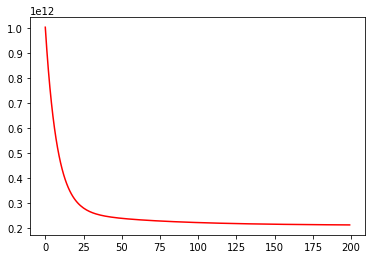

In [131]:
######### FEATURES ###############################
# Obetenemos la Features que vamos a utilizar en nuesto modelo
features_x = data_casas[['Area_Lote', 'numero_habitaciones', 'paqueos', 'anio_construccion']]
# Recordemos que x0=1, por lo que agreamos una features de valores 1
features_x['interceptor'] = 1
# Creando la Matriz X de features
X = np.array(features_x)

###### Valores de y ############    
y = data_casas['Precio']

## Numero de feautres ##
number_features = 4 + 1

## Creamos un vector donde se almacenan los valores de Theta,
## lo inicializamos con numeros aleatorios
theta_vector = np.random.rand(number_features)

## Numero de iteracions ##
iterations = 200

## Alpha ##
alpha = 0.0000005

m = len(y) 

## loss vector
loss_vec = []
## Cost vector
cost_vect = []


for iteration in range(iterations):
    '''
    IMPLELEMTA TU CODIGO AQUI, llama a la funcion para calcular la hipotesis
    que se implemento mas arriba. Parametros matriz de features X y el vector
    con los valores Theta
    '''
    hipotesis = get_hipotesis(X, theta_vector)
    
    
    theta_vector_temp = []
    for i, theta in enumerate(theta_vector):
        '''
        IMPLELEMTA TU CODIGO AQUI, adentro de este ciclo vamos a calcular
        elnuevo valor de Theta[i], utilizando la formula de la celda de arriba
        Recuerda que para multiplicar por utilizamos X[:,i]
        '''
        nuevo_theta = theta-alpha*(1/(int(m))*np.sum(np.subtract(hipotesis,y)*X[:,i]))
        
        ### aqui agregamos el nuevo valor the theta[i] a un vector temporal
        theta_vector_temp.append(nuevo_theta)
    
    
    ## Actualizamos el vector theta con los nuevos valores
    theta_vector = theta_vector_temp
    
    '''
    IMPLELEMTA TU CODIGO AQUI, llama a la funcion de costo
    '''
    cost = cost_function(X,y,theta_vector)
    
    ## Guardando el valor del costo para graficarlo ##
    cost_vect.append(cost)
    
    ## Este codigo no hay que modificarlo ##
    if(iteration % 20 == 0):
        print('#####################')
        print('Iteracion: ', iteration)
        print('Costo: ', cost)
        

print('')        
print('Costo: ', cost)



plt.plot(cost_vect, color='red', label = 'Costo')
plt.show()

### Costo en cada iteracion

Al ejecutar tu implementacion de Gradient descent en RLMV, el costo debe disminuir en cada iteracion 
por lo que la grafica de costo resultante es la siguiente:


<img src="cost_over_time.png" width="400">

In [132]:
data_casas['Prediccion'] = get_hipotesis(X, theta_vector)
data_casas = data_casas[['Area_Lote', 'numero_habitaciones', 'paqueos', 'anio_construccion', 'Precio', 'Prediccion']]
data_casas.head(20)

,Area_Lote,numero_habitaciones,paqueos,anio_construccion,Precio,Prediccion
2,79.000,3,0,1900,1035000.000,1070314.521
4,150.000,5,0,1900,1465000.000,1235988.893
6,142.000,5,2,2014,1600000.000,1270531.555
11,210.000,5,0,1910,1876000.000,1380545.788
14,107.000,3,2,1890,1636000.000,1130975.725
18,75.000,3,2,1900,1097000.000,1061028.246
24,190.000,5,2,2005,1350000.000,1378250.416
25,94.000,4,1,2009,750000.000,1156198.383
30,97.000,3,2,1890,1310000.000,1107660.032
32,110.000,5,1,1880,1200000.000,1133420.646


Los valores predecidos son distintos a los de Scikit Learn porque los theta_values de arriba son ligeramente distintos a los que da Scikit Learn con la función lm.coef y lm.intercept_

# RLMV con Scikit Learn

In [133]:
features = data_casas[['Area_Lote', 'numero_habitaciones', 'paqueos', 'anio_construccion']]
y = data_casas['Precio']

In [134]:
lm = linear_model.LinearRegression()
lm.fit(features,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Modelo

In [135]:
t1 = lm.coef_[0]
t2 = lm.coef_[1]
t3 = lm.coef_[2]
t4 = lm.coef_[3]
b = lm.intercept_
print(' y = {0}x + {1}x + {2}x  {3}x + {4}'.format(t1,t2,t3,t4, b))

 y = 992.66288706923x + 254599.25629753785x + 55288.30299300459x  -5152.457568534112x + 9937364.817429537


In [136]:
data_casas['Prediccion'] = lm.predict(features)
data_casas = data_casas[['Area_Lote', 'numero_habitaciones', 'paqueos', 'anio_construccion', 'Precio', 'Prediccion']]

In [137]:
data_casas.head(10)

,Area_Lote,numero_habitaciones,paqueos,anio_construccion,Precio,Prediccion
2,79.000,3,0,1900,1035000.000,989913.574
4,150.000,5,0,1900,1465000.000,1569591.152
6,142.000,5,2,2014,1600000.000,1084846.292
11,210.000,5,0,1910,1876000.000,1577626.349
14,107.000,3,2,1890,1636000.000,1179809.317
18,75.000,3,2,1900,1097000.000,1096519.529
24,190.000,5,2,2005,1350000.000,1178866.229
25,94.000,4,1,2009,750000.000,753073.202
30,97.000,3,2,1890,1310000.000,1169882.688
32,110.000,5,1,1880,1200000.000,1688222.091
